In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
trader_df = pd.read_csv("historical_data.csv")


Saving historical_data.csv to historical_data.csv


In [4]:
from google.colab import files
upload= files.upload()
import pandas as pd
sentiment_df = pd.read_csv("fear_greed_index.csv")

Saving fear_greed_index.csv to fear_greed_index.csv


In [5]:
print(trader_df.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [6]:
print(sentiment_df.head())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [7]:
print(trader_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [8]:
print(sentiment_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None


In [9]:
print(trader_df.describe())

       Execution Price   Size Tokens      Size USD  Start Position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

          Closed PnL      Order ID            Fee      Trade ID     Timestamp  
count  211224.000000  2.112240e+05  211224.000000  2.112240e+05  2.112240e+05  
mean       48.749001  6.965388e+10       1.163967  5.628549e+14  1.737744e+12  
std       919.164828  1.835753e+10       6.758854  3.257565e+14  8.689920e+09  
min   -117990.104100  1.732711e+08      -1.175712

In [10]:
print(sentiment_df.describe())

          timestamp        value
count  2.644000e+03  2644.000000
mean   1.631899e+09    46.981089
std    6.597967e+07    21.827680
min    1.517463e+09     5.000000
25%    1.574811e+09    28.000000
50%    1.631900e+09    46.000000
75%    1.688989e+09    66.000000
max    1.746164e+09    95.000000


In [11]:
trader_df['Timestamp']=pd.to_datetime(trader_df['Timestamp'], unit='ms')

In [12]:
from datetime import date
sentiment_df['date']=pd.to_datetime(sentiment_df['date'])

In [13]:
trader_df['date'] = (trader_df['Timestamp']).dt.date


In [14]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [15]:
sentiment_df['sentiment_score']=sentiment_df['classification'].map({'extreame fear':0,'fear':1,'Neutral':2,'Greed':3,'extreme greed':4})

In [16]:
merge_df=pd.merge(trader_df,sentiment_df[['date','sentiment_score']],on='date',how='left')

In [17]:
import os
os.makedirs('csv_files', exist_ok=True)
merge_df.to_csv('csv_files/processed_data.csv', index=False)

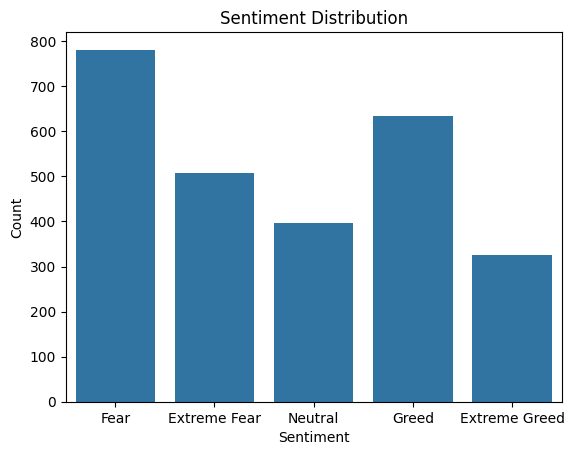

In [18]:
import os
os.makedirs('orders', exist_ok=True)

#sentiment distribution
sns.countplot(x='classification',data=sentiment_df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.savefig('orders/sentiment_distribution.png')
plt.show()

In [19]:
merge_df[['sentiment_score', 'Closed PnL']].head(10)

,sentiment_score,Closed PnL
0,3.0,0.0
1,3.0,0.0
2,3.0,0.0
3,3.0,0.0
4,3.0,0.0
5,3.0,0.0
6,3.0,0.0
7,3.0,0.0
8,3.0,0.0
9,3.0,0.0


In [20]:
clean_df = merge_df.dropna(subset=['sentiment_score', 'Closed PnL'])

In [21]:
print(clean_df['Closed PnL'].describe())
print(clean_df['sentiment_score'].value_counts())

count     43430.000000
mean         77.097834
std        1080.961124
min     -117990.104100
25%           0.000000
50%           0.000000
75%           7.208514
max       44223.451870
Name: Closed PnL, dtype: float64
sentiment_score
3.0    36289
2.0     7141
Name: count, dtype: int64


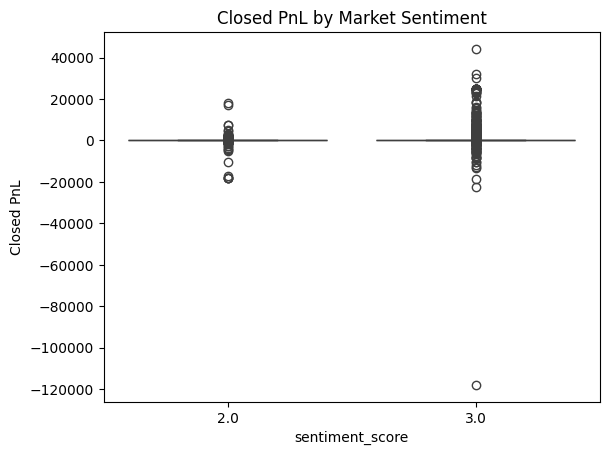

In [22]:
import os
os.makedirs('outputs', exist_ok=True)

merge_df_cleaned = merge_df.dropna(subset=['sentiment_score'])
sns.boxplot(x='sentiment_score', y='Closed PnL', data=merge_df_cleaned)
plt.title('Closed PnL by Market Sentiment')
plt.savefig('outputs/pnl_vs_sentiment.png')
plt.show()

In [25]:
print(merge_df.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date', 'sentiment_score']


In [26]:
trader_df['leverage'] = trader_df['Execution Price'] * trader_df['Size Tokens']


In [27]:
merge_df = pd.merge(trader_df, sentiment_df[['date', 'sentiment_score']], on='date', how='left')


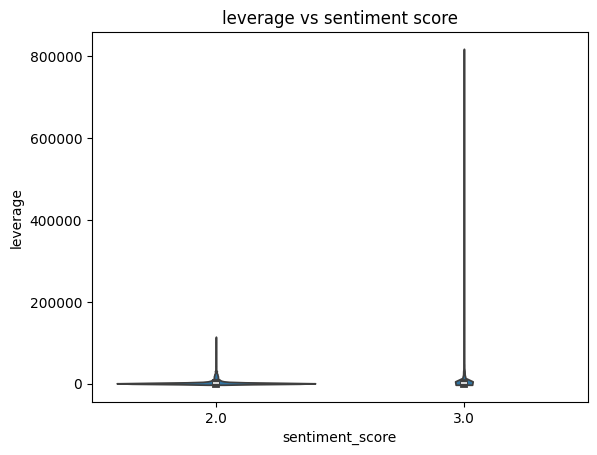

In [29]:
sns.violinplot(x='sentiment_score',y='leverage',data=merge_df)
plt.title('leverage vs sentiment score')
plt.savefig('outputs/leverage_vs_sentiment.png')
plt.show()

In [30]:
#Average leverage per sentiment score
print(merge_df.groupby('sentiment_score')['leverage'].mean())


sentiment_score
2.0    3058.848085
3.0    3182.883847
Name: leverage, dtype: float64


In [32]:
#win rate by sentiment
merge_df['is_profitable']=merge_df['Closed PnL']>0
print(merge_df.groupby('sentiment_score')['is_profitable'].mean())

sentiment_score
2.0    0.317182
3.0    0.446471
Name: is_profitable, dtype: float64


In [35]:
print(merge_df.groupby('sentiment_score')['size USD'].sum())

sentiment_score
2.0    2.184323e+07
3.0    1.155037e+08
Name: Size USD, dtype: float64


In [40]:
# Save a few CSV summaries
merge_df.groupby('sentiment_score')['leverage'].mean().to_csv('csv_files/avg_leverage.csv')
merge_df.groupby('sentiment_score')['is_profitable'].mean().to_csv('csv_files/win_rate.csv')